In [4]:
import pandas as pd
import numpy as np
from collections import Counter
drugnumbers = [39,40,43,44]

In [3]:
full_csv = pd.read_csv("emsdata.csv")

C:\Users\vogeld2\AppData\Local\Temp\ipykernel_11448\1906546336.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  full_csv = pd.read_csv("emsdata.csv")


In [12]:
# print(full_csv.dtypes)
drug_csv = full_csv[full_csv["initial_call_type"].isin(drugnumbers) | full_csv["final_call_type"].isin(drugnumbers)] 

In [15]:
drug_csv.shape

(739819, 32)

In [2]:

drug_csv = pd.read_csv("drug_related_ems.csv")



C:\Users\vogeld2\AppData\Local\Temp\ipykernel_2832\2924207596.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  drug_csv = pd.read_csv("drug_related_ems.csv")


In [4]:
drug_csv.drop(columns=drug_csv.columns[0], 
        axis=1, 
        inplace=True)
cols = drug_csv.columns
print(cols)

Index(['cad_incident_id', 'initial_severity_level_code',
       'final_severity_level_code', 'valid_dispatch_rspns_time_indc',
       'dispatch_response_seconds_qy', 'valid_incident_rspns_time_indc',
       'incident_response_seconds_qy', 'incident_travel_tm_seconds_qy',
       'held_indicator', 'incident_disposition_code', 'borough',
       'incident_dispatch_area', 'zipcode', 'policeprecinct',
       'citycouncildistrict', 'communitydistrict', 'communityschooldistrict',
       'congressionaldistrict', 'reopen_indicator', 'special_event_indicator',
       'standby_indicator', 'transfer_indicator', 'incident_dt',
       'first_assign_dt', 'first_act_dt', 'first_on_scene_dt',
       'first_to_hosp_dt', 'first_hosp_arrival_dt', 'incident_close_dt',
       'incident_year', 'initial_call_type', 'final_call_type'],
      dtype='object')


In [6]:
drug_csv.to_pickle("drug_related.pkl")

In [3]:
d = pd.read_pickle("drug_related.pkl")

In [15]:
drug_csv.to_csv("drug_related_ems.csv")

In [6]:
ems_np = d.to_numpy()

In [7]:
boroughs = ems_np[:,11]

In [5]:
import matplotlib.pyplot as plt

In [11]:
boroughsunique = np.unique(boroughs)

In [12]:
print(boroughsunique)

['BRONX' 'BROOKLYN' 'MANHATTAN' 'QUEENS' 'RICHMOND / STATEN ISLAND'
 'UNKNOWN']


<BarContainer object of 6 artists>

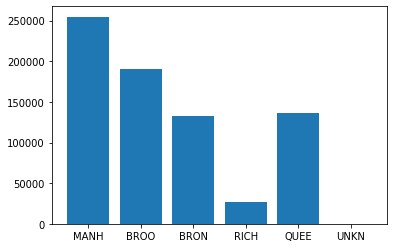

In [22]:
from collections import Counter
boroughcounts = Counter(boroughs)
# print(boroughcounts)
plt.bar(range(len(boroughcounts)), boroughcounts.values(), tick_label = [x[0:4] for x in list(boroughcounts.keys())])

Text(0.5, 1.0, 'Drug-related emergency calls per person per year')

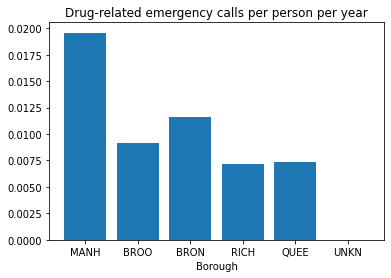

In [26]:
calls = np.asarray(list(boroughcounts.values()))
pop = np.asarray([1626159,2592149,1418733,472621,2296175,8405837])
rates = calls/pop
rates /= 8
plt.bar(range(len(boroughcounts)), rates, tick_label = [x[0:4] for x in list(boroughcounts.keys())])
plt.xlabel("Borough")
plt.title("Drug-related emergency calls per person per year")


In [8]:
ZIPCODE = [int(float(str(x).replace(",",""))) for x in ems_np[:,13] if str(x) != "nan"]
zipcounter = Counter(ZIPCODE)

In [9]:
zips = list(zipcounter.keys())
counts = list(zipcounter.values())
print(len(zips))
print(zips)

77
[13, 70, 18, 43, 121, 14, 44, 114, 17, 6, 32, 25, 10, 19, 120, 52, 103, 83, 122, 9, 110, 1, 104, 90, 40, 115, 60, 81, 62, 78, 108, 46, 26, 48, 20, 113, 75, 109, 72, 5, 42, 69, 68, 111, 61, 24, 73, 100, 63, 30, 84, 66, 123, 79, 50, 28, 33, 94, 45, 112, 102, 7, 106, 67, 49, 23, 47, 71, 105, 77, 41, 34, 88, 107, 101, 76, 22]


In [13]:
max_zip = max(zipcounter, key = zipcounter.get)
print(max_zip)

14


<BarContainer object of 77 artists>

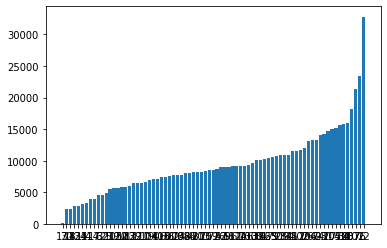

In [10]:

plt.bar(range(len(zipcounter)), sorted(counts), tick_label = zips)

In [9]:
print(ems_np.dtype.names)

None


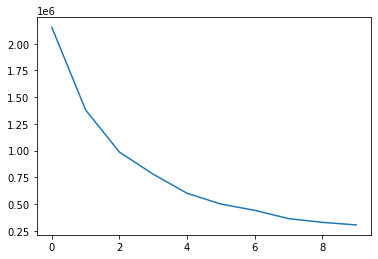

In [16]:
y = [2153709.000000756, 1379982.7839035469, 985498.0123193634, 778910.3777266023, 600300.8927582309,
     499391.366767894, 440709.1644858943, 363367.468635155, 328133.91385117185, 304231.1723485692]
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.plot(x, y)


In [14]:
health = pd.read_csv("NYC_Health___Hospitals_patient_care_locations_-_2011.csv")

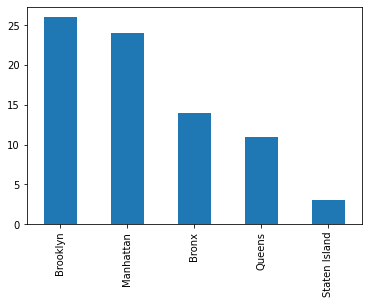

In [16]:
health["Borough"].value_counts().plot(kind='bar');

In [20]:
d[["dispatch_response_seconds_qy","incident_response_seconds_qy","incident_travel_tm_seconds_qy"]].describe()

,dispatch_response_seconds_qy,incident_response_seconds_qy,incident_travel_tm_seconds_qy
count,739819.000000,717907.000000,717924.000000
mean,79.896787,522.525560,443.723095
std,256.718155,416.660447,340.072227
min,0.000000,0.000000,0.000000
25%,16.000000,302.000000,266.000000
50%,27.000000,433.000000,387.000000
75%,52.000000,622.000000,550.000000
max,29793.000000,30294.000000,87032.000000
